<div align="center">
  <h1>Finding Optimal k for KNN using LLO CV</h1>
  <p style="font-size: 14px;">29.10.2024</p>
</div>

---

## **Problem 2: Finding the optimal *k* using Leave-One-Out Cross-Validation**

In this problem we try to find the **optimal k** value for **KNN classifier** of **MNIST** handwritten digits using **LLO CV** validation method.
As before we are going to use the **KNeighborsClassifier** from the *sklearn.neighbors* library, fetch and preprocess the data.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from tqdm import tqdm

dataset: pd.DataFrame = fetch_openml('mnist_784')

data: pd.DataFrame = dataset['data']
labels: pd.Series = dataset['target']

data = data / 255.0

data['label'] = labels

# We use 10% of the dataset for faster experimentation
data: pd.DataFrame = data.sample(frac=0.1)

# We want np.nrray because they are about 100x as it comes to indexing...
labels = data['label'].to_numpy()
data = data.drop('label', axis=1).values

data = np.ascontiguousarray(data)
labels = np.ascontiguousarray(labels)

print(data.flags['C_CONTIGUOUS'])

True


When our data/label ndarrays are not stored in a contigous memory we get about **2x slower code** when testing our model!

## Leave-One-Out Cross-Validation

**LLO CV** method consists of these steps:
- **Fit** the KNN model with **n-1** data points, where n is the number of samples
- **Validate** the model on the **single** point left out
- Repeat for every data point and calculate overall **accuracy**
  
Now we are going to **calculate accuracy** using LLO CV method for each value of k

In [63]:
k_range = range(1, 11)
result = {}

for k in k_range:
    success = 0
    times = 0

    # LOO CV for each point
    for n in tqdm(range(len(data))):
        y_train = np.delete(labels, n)
        x_train = np.delete(data, n, axis=0)

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(x_train, y_train)

        x_valid = data[n]
        y_valid = labels[n]
        
        preds: np.ndarray = knn.predict([x_valid])

        if preds[0] == y_valid:
            success += 1
        
        times += 1
    
    result[k] = success / times

print(result)


100%|██████████| 7000/7000 [02:20<00:00, 49.96it/s]

{1: 0.943, 2: 0.9288571428571428, 3: 0.9405714285714286, 4: 0.9422857142857143, 5: 0.94, 6: 0.9395714285714286, 7: 0.94, 8: 0.9382857142857143, 9: 0.9381428571428572, 10: 0.9375714285714286}


As we see, the best value for k is **1**, as higher values tend to decrease the mean accuracy of our KNN model.  
###### Note that we also got this result in previous problem :)

## **Plot the result**

First we can **select**, the **best value for k** as max from the result we got in previous *block*, and then we can **plot** the mean accuracy of model for each k.

1


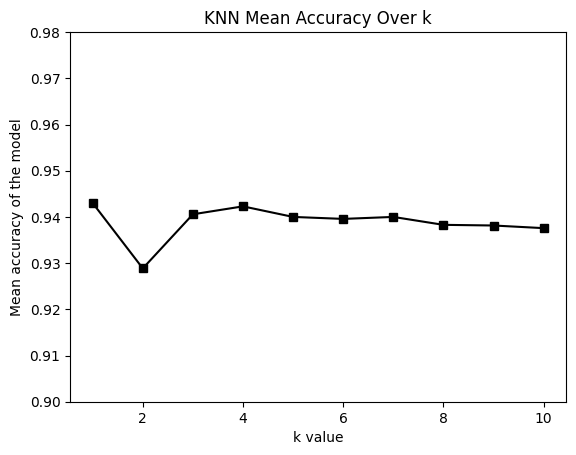

In [64]:
import matplotlib.pyplot as plt

best_k = max(result, key=result.get)

print(best_k)

k_accuracy = [mean for index, mean in result.items()]

plt.plot(k_range, k_accuracy, marker='s', color='black')
plt.xlabel('k value')
plt.ylabel('Mean accuracy of the model')
plt.title('KNN Mean Accuracy Over k')
plt.ylim(0.9, 0.98)
plt.show()

## **Final Thoughts**

Using **Leave-One-Out Cross-Validation** (LOO CV), we deduced k=1 as the optimal value for KNN classifier for MNIST hand-written digist.

---
<div style="text-align: right;">
Piotr Stachowicz  
 
337942
</div>